# Gráfico de Portfólio no Python 
- @victordhn
- adaptado de @neuralnine

### Libraries utilizadas:
- yfinance
- datetime
- pandas
- matplotlib

### Alguns pontos importantes:
1. O programa utiliza o yfinance, que busca dados do Yahoo Finance, portanto, não temos como especificar produtos de renda fixa (exemplo. LTN, LFT, CDB, etc.) - utilizaremos o valor agregado, em Reais, do seu investimento em renda fixa.
2. Por ser um programa de treino apenas, utilizaremos - outros valores - para tudo aquilo que não são ações nem renda fixa (também agregados em Reais).
3. Novamente, por ser um programa de treino, é preciso colocar novamente todos os dados caso haja alteração no portfolio (fica o exercício para você treinar caso deseje programar um código com entradas e saídas futuras em investimentos).
4. Caso algum investimento seja em outra moeda, o programa não irá converter para reais

In [14]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# para ignorar uns warnings chatos do Jupyter
import warnings
warnings.filterwarnings('ignore')

#### Aqui vamos rodar um codigo de inputs pedindo ticker e quantidade de cada ação, ou investimentos em RF e/ou outros
- Primeiros digitamos AC para ações, RF para renda fixa ou OU para outros.
- Em ações, podemos especificar tickers e quantidades, sempre usando o .SA no final quando for ação brasileira
- Em RF e outros, você deve especificar apenas o valor total investido

In [15]:
tickers = []
quantidades = []
precos = []
total = []

while True:
    print()
    tipo = input('Entre o tipo de investimento: AC para ações; RF para renda fixa; OU para outros. Digite FIM quando não tiver mais investimentos para adicionar: ')
    tipo = tipo.lower()
    print()
    
    if tipo == 'ac':
        print('Vamos adicionar suas ações, 1 por 1:')
        print()
        while True:
            tick = input('Ticker da ação (se for brasileira, usar ".SA" no final): ')
            quant = int(input(f'Entre a quantidade de ações {tick} no seu portfolio: '))
            outra = input("Possui outras ações? Digite 1 para sim ou 0 para não: ")
            print()
            outra = outra.lower()
            tickers.append(tick.upper())
            quantidades.append(quant)
            if outra == '0':
                break
            
    if tipo == 'rf':
        rf = int(input('Quantos reais você tem investido em renda fixa? (não utilize R$ na resposta) '))
    if tipo == 'ou':
        outros = int(input('Quantos reais você tem investido em outros investimentos? (não utilize R$ na resposta) '))
    if tipo == 'fim':
        break


Entre o tipo de investimento: AC para ações; RF para renda fixa; OU para outros. Digite FIM quando não tiver mais investimentos para adicionar: AC

Vamos adicionar suas ações, 1 por 1:

Ticker da ação (se for brasileira, usar ".SA" no final): PETR4.SA
Entre a quantidade de ações PETR4.SA no seu portfolio: 500
Possui outras ações? Digite 1 para sim ou 0 para não: 1

Ticker da ação (se for brasileira, usar ".SA" no final): BBAS3.SA
Entre a quantidade de ações BBAS3.SA no seu portfolio: 500
Possui outras ações? Digite 1 para sim ou 0 para não: 0


Entre o tipo de investimento: AC para ações; RF para renda fixa; OU para outros. Digite FIM quando não tiver mais investimentos para adicionar: RF

Quantos reais você tem investido em renda fixa? (não utilize R$ na resposta) 10000

Entre o tipo de investimento: AC para ações; RF para renda fixa; OU para outros. Digite FIM quando não tiver mais investimentos para adicionar: OU

Quantos reais você tem investido em outros investimentos? (não utili

#### No código abaixo usamos o pacote yfinance para baixar dados das ações especificadas

In [16]:
# Para cada ação, pegamos os preços de qualquer data até a data atual (tanto faz o início) e vamos salvar...
# ...o preço de fechamento do dia mais atual na lista precos
for tick in tickers:
    preco = yf.download(tick,dt.datetime(2023,1,1),dt.datetime.now())
    precos.append(preco['Close'][-1])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
# Salvando o valor total investido em cada ação na lista total, e adicionando RF e Outros nas listas
i = 0
while i < len(tickers):
    total.append(quantidades[i]*precos[i])
    i+=1
    
total.append(int(rf))
tickers.append('Renda Fixa')

total.append(int(outros))
tickers.append('Outros')

- O código abaixo é opicional. Ele apenas tira o .SA do nome da ações para ficar estéticamente mais legal no gráfico

In [18]:
# opcional, para tirar o .SA dos tickers, usar lista ticker2 daqui em diante
tickers2 = []
for i in tickers:
    i = i.replace('.SA','')
    tickers2.append(i)

### Resultado
- Aqui plotamos o gráfico completo
- Recomendo que altere alguns parâmetros para ver como ficará melhor para você.

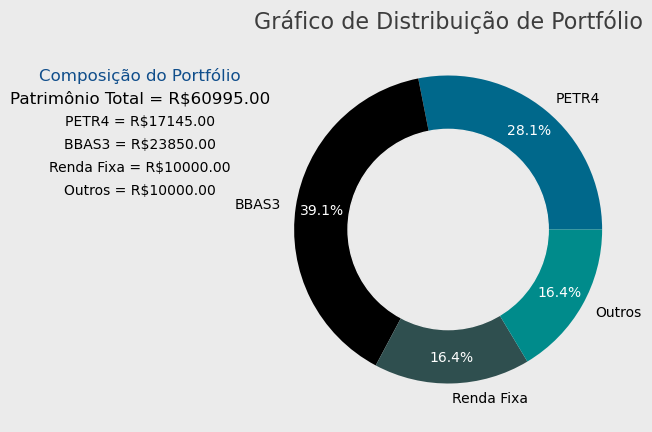

In [90]:
#Plotando o gráfico

fig, ax = plt.subplots(figsize=(10,5))
ax.set_facecolor('white')
ax.figure.set_facecolor('#EBEBEB')
ax.tick_params(axis='x',color='#3D3D3D')
ax.tick_params(axis='y',color='#3D3D3D')
ax.set_title('Gráfico de Distribuição de Portfólio',color='#3D3D3D',fontsize=16)

#AQUI DEFINO AS CORES DO GRÁFICO
pie_colors = ['#00688B', '#000000', '#2F4F4F', '#008B8B']

#AQUI VOCÊ CONTROLA A DISTÂNCIA DOS VALORES % DO CENTRO DO CIRCULO PELO PARÂMETRO -> pctdistance=0.83
patches,texts,autotexts = ax.pie(total, labels=tickers2, autopct='%1.1f%%', pctdistance=0.83, colors=pie_colors)
#JÁ AQUI VOCÊ CONTROLA A COR DO TEXTO
[text.set_color('black') for text in texts]
[autotext.set_color('white') for autotext in autotexts]

my_circle=plt.Circle((0,0), 0.65, color='#EBEBEB')
plt.gca().add_artist(my_circle)


#PARTE LATERAL DO TEXTO
ax.text(-2,1,'Composição do Portfólio',fontsize=12, color='#104E8B',\
        verticalalignment='center',horizontalalignment='center')
ax.text(-2,0.85,f'Patrimônio Total = R${sum(total):.2f}',fontsize=12,color='black',\
        verticalalignment='center',horizontalalignment='center')
counter = 0.15
for ticker in tickers2:
    ax.text(-2,0.85-counter,f'{ticker} = R${total[tickers2.index(ticker)]:.2f}',fontsize=10,color='black',\
            verticalalignment='center',horizontalalignment='center')
    counter += 0.15


plt.show()